# Project: Project-Name

Authors:

* Arpan Sutaria
* Devesh Patel
* Htin Linn Htoo Than
* Jay Patel
* Kevinkumar Patel


# Project Introduction

TODO: an introduction that discusses the data and related problems that you are investigating.

# Any changes since the proposal
Describe the previous project in brief. Mention why we shifted to our current project.

# Data - Htin Linn
Explain how you obtained the data, and prepared the data.

We mainly obtained the data by downloading from https://www.zillow.com/research/data/ according to the geogrpahy and data types needed. We found an abundance of data on house prices on which we are able to make hypotheses on. However, since many of the datasets have missing values, we each had to clean the that we chose to work on so that there aren't any errors when doing visualizations or machine learning analysis. 

# Exploratory Data Analysis (EDA) - Htin Linn
TODO: explain what your data looks like (visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.

# Visualization (Needed at least 5)

## Visualization: Arpan

Hypothesis: There is a co-relation between schools and home values in a given area.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# in case you don't have the library installed
# %pip install openpyxl

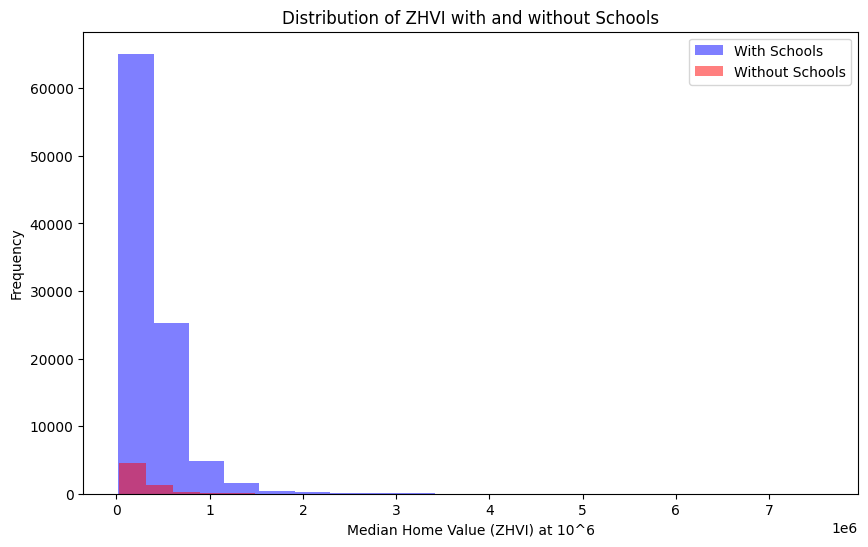

In [2]:
# Load ZHVI data
zhvi_data = pd.read_csv("datasets\Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zhvi_data = zhvi_data.drop('SizeRank', axis=1)
zhvi_data = zhvi_data.drop('StateName', axis=1)
zhvi_data = zhvi_data.rename(columns={'RegionName': 'ZIP'})  # Rename the 'RegionName' column to 'ZIP' in zhvi_data
# print(zhvi_data.columns)


# Load school data
school_data = pd.read_excel("datasets\EDGE_GEOCODE_PUBLICSCH_2122.xlsx")
# print(school_data.columns)

# Create two separate dataframes
zhvi_with_schools = zhvi_data.merge(
    school_data[['ZIP', 'STATE', 'NAME']],
    on='ZIP',
    how='inner'
)

# Create 'zhvi_without_schools' dataframe
zhvi_without_schools = zhvi_data[~zhvi_data['ZIP'].isin(school_data['ZIP'])]

# Select the columns of interest for both dataframes
columns_of_interest = [
    'RegionID', 'ZIP', 'State', 'City', 'Metro', 'CountyName', '2023-09-30'
]

zhvi_with_schools = zhvi_with_schools[columns_of_interest + ['NAME']]
zhvi_without_schools = zhvi_without_schools[columns_of_interest]

# print(zhvi_with_schools.head(5))
# print(zhvi_without_schools.head(5))

plt.figure(figsize=(10, 6))
plt.hist(zhvi_with_schools['2023-09-30'], bins=20, alpha=0.5, color='blue', label='With Schools')
plt.hist(zhvi_without_schools['2023-09-30'], bins=20, alpha=0.5, color='red', label='Without Schools')
plt.xlabel('Median Home Value (ZHVI) at 10^6')
plt.ylabel('Frequency')
plt.title('Distribution of ZHVI with and without Schools')
plt.legend()
plt.show()

# ML Analysis (needed at least 2)

# Reflection
TODO:
○ What is the most challenging part of the project that you’ve encountered so far?
○ What are your initial insights?
○ Are there any concrete results you can show at this point? If not, why not?
○ Going forward, what are the current biggest problems you’re facing?
○ Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
○ Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

# Next Step
TODO: Concrete plans and goals for the next month